# # Mpping to emotion

In [1]:
import numpy as np
import pandas as pd

# Function to normalize values to range [-1, 1]
def normalize(value, min_val, max_val):
    return 2 * ((value - min_val) / (max_val - min_val)) - 1

# Function to map physiological data to Valence-Arousal space
def map_to_valence_arousal(hr, hrv, scl):
    """
    Maps HR, HRV, and SCL values to valence-arousal coordinates.

    hr  - Heart Rate (higher → more aroused)
    hrv - Heart Rate Variability (higher → more relaxed)
    scl - Skin Conductance Level (higher → more aroused)
    """

    # Define physiological feature ranges (adjust based on dataset)
    HR_RANGE = (50, 180)  # Typical HR range
    HRV_RANGE = (10, 120)  # HRV range (RMSSD in ms)
    SCL_RANGE = (0.1, 20)  # Skin Conductance (µS)

    # Normalize features to [-1, 1]
    hr_norm = normalize(hr, *HR_RANGE)
    hrv_norm = normalize(hrv, *HRV_RANGE)
    scl_norm = normalize(scl, *SCL_RANGE)

    # Compute Arousal (Y-axis) - higher HR, lower HRV, higher SCL → more aroused
    arousal = (hr_norm - hrv_norm + scl_norm) / 3

    # Compute Valence (X-axis) - higher HRV, lower SCL → more pleasant
    valence = (hrv_norm - scl_norm) / 2

    return valence, arousal

# Example: Mapping a user’s physiological state
hr = 85  # Heart Rate (BPM)
hrv = 40  # Heart Rate Variability (RMSSD in ms)
scl = 5   # Skin Conductance Level (µS)

valence, arousal = map_to_valence_arousal(hr, hrv, scl)
print(f"Mapped Coordinates → Valence: {valence:.2f}, Arousal: {arousal:.2f}")


Mapped Coordinates → Valence: 0.03, Arousal: -0.17


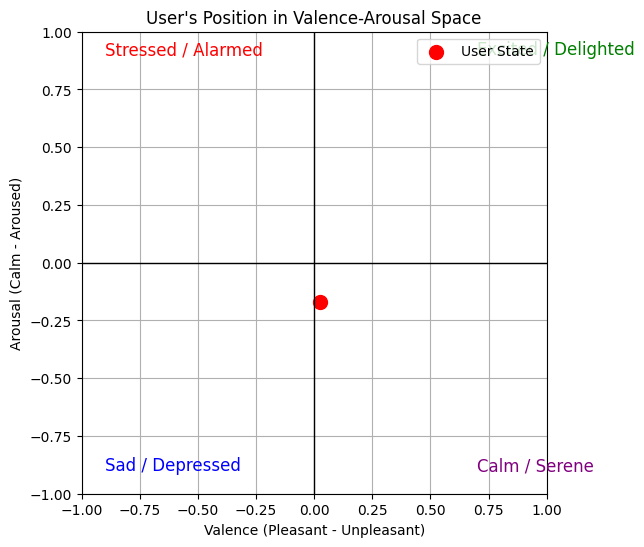

In [2]:
import matplotlib.pyplot as plt

def plot_valence_arousal(valence, arousal):
    plt.figure(figsize=(6,6))
    plt.axhline(0, color='black', linewidth=1)  # Horizontal axis (Valence)
    plt.axvline(0, color='black', linewidth=1)  # Vertical axis (Arousal)

    # Plot quadrants labels
    plt.text(-0.9, 0.9, "Stressed / Alarmed", fontsize=12, color='red')
    plt.text(0.7, 0.9, "Excited / Delighted", fontsize=12, color='green')
    plt.text(-0.9, -0.9, "Sad / Depressed", fontsize=12, color='blue')
    plt.text(0.7, -0.9, "Calm / Serene", fontsize=12, color='purple')

    # Plot the mapped point
    plt.scatter(valence, arousal, color='red', s=100, label="User State")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("Valence (Pleasant - Unpleasant)")
    plt.ylabel("Arousal (Calm - Aroused)")
    plt.title("User's Position in Valence-Arousal Space")
    plt.legend()
    plt.grid()
    plt.show()

plot_valence_arousal(valence, arousal)


In [3]:
import numpy as np
import time

# Function to classify the user's emotion based on valence & arousal
def classify_emotion(valence, arousal):
    if valence > 0.5 and arousal > 0.5:
        return "Excited / Delighted"
    elif valence > 0.5 and arousal < -0.5:
        return "Calm / Relaxed"
    elif valence < -0.5 and arousal > 0.5:
        return "Stressed / Alarmed"
    elif valence < -0.5 and arousal < -0.5:
        return "Sad / Depressed"
    elif arousal > 0.5:
        return "Alert / Happy"
    elif arousal < -0.5:
        return "Tired / Sleepy"
    elif valence > 0:
        return "Pleased / Serene"
    else:
        return "Frustrated / Upset"

# Function to simulate real-time stress detection with a time limit
def real_time_stress_detection(duration=30, interval=5):
    start_time = time.time()  # Start time tracking

    while time.time() - start_time < duration:
        # Generate simulated physiological signals
        hr = np.random.uniform(60, 120)  # Heart Rate (BPM)
        hrv = np.random.uniform(20, 100)  # Heart Rate Variability (ms)
        scl = np.random.uniform(0.5, 15)  # Skin Conductance Level (µS)

        # Map to valence-arousal space
        valence, arousal = map_to_valence_arousal(hr, hrv, scl)

        # Classify user emotion
        emotion = classify_emotion(valence, arousal)

        # Display results
        print(f"HR: {hr:.1f} BPM, HRV: {hrv:.1f} ms, SCL: {scl:.2f} µS")
        print(f"Valence: {valence:.2f}, Arousal: {arousal:.2f} → Emotion: {emotion}\n")

        time.sleep(interval)  # Wait before next update

    print("🔴 Test completed. Stopping real-time stress detection.")

# Run the test for 30 seconds
real_time_stress_detection(duration=30, interval=5)


HR: 84.4 BPM, HRV: 30.6 ms, SCL: 9.54 µS
Valence: -0.29, Arousal: 0.03 → Emotion: Frustrated / Upset

HR: 67.1 BPM, HRV: 73.2 ms, SCL: 6.10 µS
Valence: 0.27, Arousal: -0.43 → Emotion: Pleased / Serene

HR: 65.4 BPM, HRV: 23.8 ms, SCL: 13.88 µS
Valence: -0.57, Arousal: 0.12 → Emotion: Frustrated / Upset

HR: 77.1 BPM, HRV: 23.1 ms, SCL: 1.29 µS
Valence: 0.06, Arousal: -0.23 → Emotion: Pleased / Serene

HR: 89.6 BPM, HRV: 45.3 ms, SCL: 1.57 µS
Valence: 0.25, Arousal: -0.29 → Emotion: Pleased / Serene

HR: 119.7 BPM, HRV: 49.6 ms, SCL: 4.36 µS
Valence: 0.15, Arousal: -0.07 → Emotion: Pleased / Serene

🔴 Test completed. Stopping real-time stress detection.
